In [1]:
import numpy as np
import matplotlib.pyplot as plt

need to get the center point by seeding with some k value 

will use a tiny interval to find the center. 

``fatten interval" as they call it



In [2]:
orig_reg_area = lambda q, eps: 2 * eps * np.pi * (1 - q**2) / (2 * np.pi)

ellipse_area = lambda a, b: a * b * np.pi


area_ratio = lambda q, eps: (1 - q**2) * 2 * eps * np.pi / (6 * np.arcsin(eps / 2) * np.pi * (1 - q) / 2)

# use concentric circle formula
# so this will be (1 - (q)^2) * pi * 2eps

# area_ratio_2 = lambda q, eps: (1 - q**2) * 2 * eps * np.pi/ (eps / 2 * (1 - q) / 2 * np.pi)

area_ratio_2 = lambda q, eps: orig_reg_area(q, eps) / ellipse_area((1- q) / np.sqrt(2), 2 * eps / np.sqrt(2))


area_ratio(0.9, 0.1)

2.532277029130284

In [3]:
orig_reg_area(0.9, np.pi) - np.pi * (1 - 0.81)

0.0

In [4]:
ellipse_area((1- 0.9) / 2 / np.sqrt(2), 0.1 / np.sqrt(2))

0.007853981633974482

In [5]:
orig_reg_area(0.9, 0.1)

0.018999999999999996

In [6]:
area_ratio_2(0.9, 1e-10)

0.6047887837492024

In [7]:
3 * np.sqrt(3) / (4 * np.pi)

0.41349667156634407

C:\Users\keepw\AppData\Local\Temp\ipykernel_19624\4129077193.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = ellipse_mat_val(x_range[i] - x0, y_range[j] - y0, make_ellipse_matrix(theta, q, eps))


(0.4, 0.77)

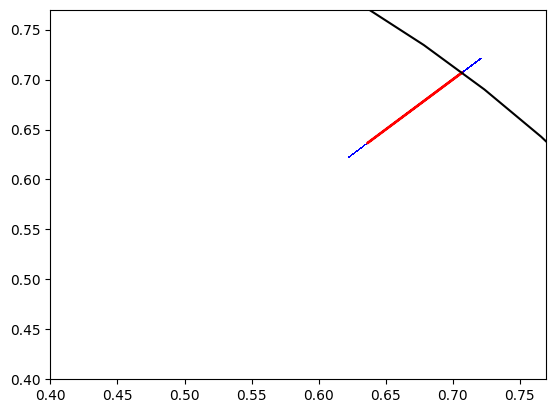

In [8]:
# let's see if we can correctly create the ellipse

def make_ellipse_matrix(theta, q, eps):
    # a, b, c, d, e, f = find_coefficients(0, 0, theta, (1-q)/2, 6 * np.arcsin(eps / 2))
    a, b, c, d, e, f = find_coefficients(0, 0, theta, (1-q) / np.sqrt(2), 2 * eps / np.sqrt(2))
    
    
    # so that Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
    # D, E = 0 so 
    # Ax^2 + Bxy + Cy^2 = -F
    # -A/F x^2 - B/F xy - C/F y^2 = 1
    
    return np.array([[a, b/2], [b/2, c]]) / -f

def ellipse_mat_val(x, y, mat):
    u = np.array([[x, y]]).T
    return u.T @ mat @ u
    

def ellipse_val(x, y, a, b, c, d, e, f):
    return a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

def find_coefficients(x0, y0, theta, a, b):
    # x0, y0 are the center of the ellipse
    # theta is the angle of rotation
    # a, b are the semi-major and semi-minor axes
    # returns the coefficients of the ellipse equation
    # a*x^2 + b*x*y + c*y^2 + d*x + e*y + f = 0
    
    # first we need to rotate the ellipse
    A = a**2 * np.sin(theta)**2 + b**2 * np.cos(theta)**2
    B = 2*(b**2 - a**2) * np.sin(theta) * np.cos(theta)
    C = a**2 * np.cos(theta)**2 + b**2 * np.sin(theta)**2
    D = -2*A*x0 - B*y0
    E = -B*x0 - 2*C*y0
    F = A*x0**2 + B*x0*y0 + C*y0**2 - a**2*b**2
    
    return A, B, C, D, E, F

def check_in_region(x, q, theta, eps):
    if np.abs(x) < q or np.abs(x) > 1:
        return False
    if np.angle(x) < theta - eps or np.angle(x) > theta + eps:
        # print(f"angle={np.angle(x)}, theta={theta}, eps={eps}")
        return False
    return True


q = 0.9
theta = np.pi/4
eps = 1e-5


x_range = np.linspace(0.4, 0.77, 500)
y_range = np.linspace(0.4, 0.77, 500)

mid_distance = (1 - q)/2 + q
x0 = mid_distance * np.cos(theta)
y0 = mid_distance * np.sin(theta)

# a, b, c, d, e, f = find_coefficients(x0, y0, np.pi/4, (1-q)/2, np.arcsin(eps / 2))
a, b, c, d, e, f = find_coefficients(0, 0, np.pi/4, (1-q)/ np.sqrt(2), 2 * eps / np.sqrt(2))

# 6 * np.arcsin(eps / 2)


X, Y = np.meshgrid(x_range, y_range)
# Z = ellipse_val(X, Y, a, b, c, d, e, f)
# Z = ellipse_val(X - x0, Y - y0, a, b, c, d, e, f)

IR = np.zeros((len(X), len(Y)))
Z = np.zeros((len(X), len(Y)))
for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i, j] = ellipse_mat_val(x_range[i] - x0, y_range[j] - y0, make_ellipse_matrix(theta, q, eps))
        
        IR[i, j] = check_in_region(x_range[i] + 1j*y_range[j], q, theta, eps)

Z = Z <= 1

# Z = ellipse_mat_val(X - x0, Y - y0, make_ellipse_matrix(theta, q, eps))

# IR = np.vectorize(check_in_region)(X + 1j*Y, q, theta, eps)

# plot the ellipse filled in
plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors=['blue'])

# plot the region
plt.contour(X, Y, IR, levels=[0.5, 1.5], colors=['red'])

# plot the frontier of the unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), color='black')

plt.xlim(min(x_range), max(x_range))
plt.ylim(min(y_range), max(y_range))

# plt.xlim(0.7, 0.71)
# plt.ylim(0.7, 0.71)


In [9]:
def compute_bounding_box(ellipse):
    # return w, h
    # see boundingbox code in Haskell
    det = np.linalg.det(ellipse)
    sqrtdet = np.sqrt(det)
    a = ellipse[0,0]
    d = ellipse[1,1]
    
    print(f"det={det}, sqrtdet={sqrtdet}, a={a}, d={d}")
    
    return np.sqrt(d) / sqrtdet, np.sqrt(a) / sqrtdet

In [10]:
np.linalg.det(np.array([[a0, b0/2], [b0/2, c0]]))

NameError: name 'a0' is not defined

det=100.00000000000004, sqrtdet=10.000000000000002, a=14.193405015836467, d=14.806594984163532
[[14.19340502 10.49552283]
 [10.49552283 14.80659498]]
w=0.38479338591201806, h=0.37674135711169887


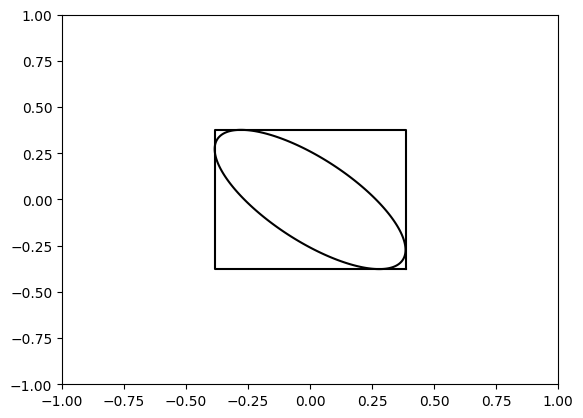

In [11]:
a0, b0, c0, d0, e0, f0 = find_coefficients(0, 0, 0.8, 0.2, 0.5)

ellipse = np.array([[a0, b0/2], [b0/2, c0]]) / -f0
a0 = ellipse[0,0]
b0 = ellipse[0,1]
c0 = ellipse[1,1]


x_range = np.linspace(-1, 1, 500)
y_range = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x_range, y_range)

# plot the ellipse
plt.contour(X, Y, ellipse_val(X, Y, a0, 2 * b0, c0, d0, e0, 0), levels=[0, 1], colors=['black'])

# plot bounding box
w, h = compute_bounding_box(ellipse)

# print array
print(np.array([[a0, b0], [b0, c0]]))

# plot bounding box
plt.plot([w, w, -w, -w, w], [-h, h, h, -h, -h], color='black')
print(f"w={w}, h={h}")

In [ ]:
ellipse_val(X, Y, a0, b0, c0, d0, e0, f0) 

array([[0.003136  , 0.00310594, 0.00308008, ..., 0.07833636, 0.07913408,
        0.079936  ],
       [0.00310594, 0.003072  , 0.00304226, ..., 0.0775422 , 0.07833604,
        0.07913408],
       [0.00308008, 0.00304226, 0.00300865, ..., 0.07675224, 0.0775422 ,
        0.07833636],
       ...,
       [0.07833636, 0.0775422 , 0.07675224, ..., 0.00300865, 0.00304226,
        0.00308008],
       [0.07913408, 0.07833604, 0.0775422 , ..., 0.00304226, 0.003072  ,
        0.00310594],
       [0.079936  , 0.07913408, 0.07833636, ..., 0.00308008, 0.00310594,
        0.003136  ]])

In [ ]:
print(a, b, c, d, e, f)

0.0012501250000104163 -0.0024997499999791658 0.0012501250000104163 -3.3587574905331527e-07 -3.3587574905331527e-07 2.2500001875000342e-07


In [ ]:
find_coefficients(0, 0, np.pi/4, (1-q)/2, np.arcsin(eps / 2))

(0.0012501250000104163,
 -0.0024997499999791658,
 0.0012501250000104163,
 0.0,
 0.0,
 -6.250000520833401e-10)

can then divide everything by F so that it's rescaled to 1
need to think about how to peel off the -p factor safely and then still translate

In [ ]:
np.array([[a, b], [b, c]])

array([[ 0.00125013, -0.00249975],
       [-0.00249975,  0.00125013]])

In [ ]:
np.any(IR)

False